In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import operator
#from itertools import product #for cartesian product

import networkx as nx
import scipy as sp

import warnings
warnings.filterwarnings('ignore')


#pd.set_option('display.max_rows', 500)

# CREATE GRAPH'S NODES / STEP 15

## CREATE GRAPH'S NODE

In [ ]:
Skills_Graph = nx.Graph()

### READ SKILLS

In [ ]:
df_skills = pd.DataFrame(columns=['Skill'])

In [ ]:
skills = pd.read_csv("yazilim_uzmani_skills_counts_v1.csv")

In [ ]:
skills.head(1)

,Unnamed: 0,Skill
0,java,867


In [ ]:
df_skills["Skill"] = skills["Unnamed: 0"]

In [ ]:
df_skills.head(5)

,Skill
0,java
1,yazılım geliştirme
2,üniversite mezunu
3,askerlik engelinin bulunmaması
4,html


In [ ]:
Skills_Graph.add_nodes_from(df_skills["Skill"])

In [ ]:
Skills_Graph

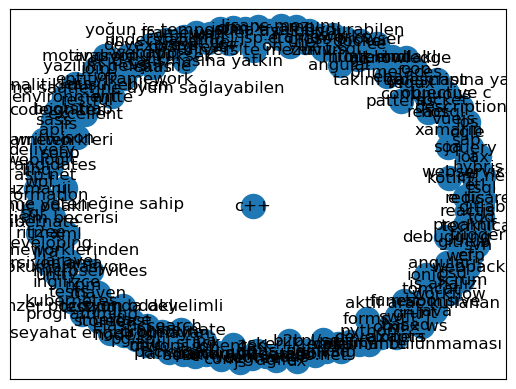

In [ ]:
nx.draw_networkx(Skills_Graph)
plt.show()

In [ ]:
Skills_Graph.number_of_nodes()

198

# CRETAE GRAPH'S EDGE / STEP 16

In [ ]:
skills_with_post = pd.read_csv("yazilim_uzmani_skills_v2.csv")

In [ ]:
skills_with_post = skills_with_post.drop(["Unnamed: 0","index"],axis=1)

In [ ]:
skills_with_post.head(50)

,PostId,SentenceId,Skill
0,Post0,Sentence1,erp
1,Post0,Sentence1,sap
2,Post0,Sentence1,go
3,Post0,Sentence2,lisans mezunu
4,Post0,Sentence3,erp
5,Post0,Sentence7,ekip çalışmasına yatkın
6,Post0,Sentence8,problem çözme yeteneğine sahip
7,Post0,Sentence12,yazılım geliştirme
8,Post1,Sentence15,üniversite mezunu
9,Post1,Sentence16,yazılım geliştirme


### According to post_id

In [ ]:
groups_posts =skills_with_post.groupby(['PostId'])

In [ ]:
post_ids = skills_with_post["PostId"].value_counts().index.tolist()

In [ ]:
post_ids

['Post815',
 'Post475',
 'Post841',
 'Post543',
 'Post870',
 'Post555',
 'Post532',
 'Post81',
 'Post783',
 'Post549',
 'Post473',
 'Post345',
 'Post462',
 'Post281',
 'Post663',
 'Post735',
 'Post102',
 'Post1089',
 'Post504',
 'Post359',
 'Post84',
 'Post821',
 'Post799',
 'Post1060',
 'Post503',
 'Post451',
 'Post365',
 'Post982',
 'Post469',
 'Post794',
 'Post515',
 'Post610',
 'Post949',
 'Post900',
 'Post604',
 'Post818',
 'Post806',
 'Post552',
 'Post634',
 'Post959',
 'Post797',
 'Post927',
 'Post588',
 'Post1091',
 'Post645',
 'Post1069',
 'Post224',
 'Post291',
 'Post971',
 'Post306',
 'Post9',
 'Post656',
 'Post207',
 'Post392',
 'Post824',
 'Post707',
 'Post817',
 'Post229',
 'Post717',
 'Post679',
 'Post55',
 'Post678',
 'Post387',
 'Post389',
 'Post898',
 'Post777',
 'Post432',
 'Post851',
 'Post454',
 'Post411',
 'Post576',
 'Post835',
 'Post176',
 'Post466',
 'Post361',
 'Post34',
 'Post965',
 'Post591',
 'Post1102',
 'Post970',
 'Post388',
 'Post202',
 'Post186',
 'Pos

In [ ]:
def add_edges_with_post(post_list):
    edge = "" 
    reverse_edge =""
    for post_id in post_list :
        nodes = groups_posts.get_group(post_id)["Skill"].tolist()
        for i in range(len(nodes)):
            for j in range(i+1,len(nodes)):
                edge = nodes[i]+","+nodes[j]
                reverse_edge = nodes[j]+","+nodes[i]
                if edges_with_post_id[edges_with_post_id.Edge.isin([edge])].empty==True and edges_with_post_id[edges_with_post_id.Edge.isin([reverse_edge])].empty==True:
                    edges_with_post_id.loc[len(edges_with_post_id.index)] =  [edge,1]
                else:
                    if(edges_with_post_id[edges_with_post_id.Edge.isin([reverse_edge])].empty==False):
                        edges_with_post_id.loc[edges_with_post_id.Edge.isin([reverse_edge]), 'Weight'] +=1
                    else: 
                        edges_with_post_id.loc[edges_with_post_id.Edge.isin([edge]), 'Weight'] +=1

In [ ]:
edges_with_post_id = df_skills = pd.DataFrame(columns=['Edge',"Weight"])

In [ ]:
add_edges_with_post(post_ids)

In [ ]:
edges_with_post_id.head(60)

,Edge,Weight
0,"android,join",15
1,"android,information",9
2,"android,based",12
3,"android,candidates",10
4,"android,developing",37
5,"android,android",91
6,"android,environment",29
7,"android,java",150
8,"android,programming",27
9,"android,go",75


In [ ]:
edges_with_post_id["Edge"].value_counts().head()

angularjs,solving                         1
reactjs,askerlik engelinin bulunmaması    1
pattern,json                              1
oriented,tsql                             1
.net,write                                1
Name: Edge, dtype: int64

In [ ]:
edges_with_post_id[edges_with_post_id["Weight"]==2]

,Edge,Weight
50,"join,kotlin",2
51,"join,least",2
55,"join,mvvm",2
56,"join,pattern",2
57,"join,xml",2
...,...,...
11230,"aktif araç kullanan,müşteri odaklı",2
11231,"esnek çalışma saatlerine uyum sağlayabilen,hybris",2
11235,"sap,ritma",2
11236,"pl/sql,dökümantasyon",2


In [ ]:
edges_with_post_id.to_csv("yazilim_uzmani_edges_with_post_id.csv")

### Normalize weights

In [ ]:
edges_with_post_id = pd.read_csv("yazilim_uzmani_edges_with_post_id.csv")
edges_with_post_id = edges_with_post_id.drop(["Unnamed: 0"],axis=1)
edges_with_post_id.head()

,Edge,Weight
0,"android,join",15
1,"android,information",9
2,"android,based",12
3,"android,candidates",10
4,"android,developing",37


In [ ]:
edges_with_post_id['Weight'] = MinMaxScaler(feature_range=(0.1, 1)).fit_transform(np.array(edges_with_post_id['Weight']).reshape(-1,1))

In [ ]:
edges_with_post_id.head(50)

,Edge,Weight
0,"android,join",0.119505
1,"android,information",0.111146
2,"android,based",0.115325
3,"android,candidates",0.112539
4,"android,developing",0.150155
5,"android,android",0.225387
6,"android,environment",0.139009
7,"android,java",0.307585
8,"android,programming",0.136223
9,"android,go",0.203096


### According to sentence_id

In [ ]:
edges_with_post_id["Weight2"]=0

In [ ]:
sentence_list =skills_with_post.groupby(['PostId', 'SentenceId'])

In [ ]:
def increase_weight_with_sentence(sentence_list):
    edge = "" 
    reverse_edge =""
    for sentence_id in sentence_list :
        nodes = sentence_list.get_group(sentence_id[0])["Skill"].tolist()
        for i in range(len(nodes)):
            for j in range(i+1,len(nodes)):
                edge = nodes[i]+","+nodes[j]
                reverse_edge = nodes[j]+","+nodes[i]
                if edges_with_post_id[edges_with_post_id.Edge.isin([edge])].empty==True and edges_with_post_id[edges_with_post_id.Edge.isin([reverse_edge])].empty==True:
                    print("error")
                else:
                    if(edges_with_post_id[edges_with_post_id.Edge.isin([reverse_edge])].empty==False):
                        edges_with_post_id.loc[edges_with_post_id.Edge.isin([reverse_edge]), 'Weight2'] +=1
                    else: 
                        edges_with_post_id.loc[edges_with_post_id.Edge.isin([edge]), 'Weight2'] +=1

In [ ]:
increase_weight_with_sentence(sentence_list)

In [ ]:
edges_with_post_id.head()

,Edge,Weight,Weight2
0,"android,join",0.119505,1
1,"android,information",0.111146,1
2,"android,based",0.115325,1
3,"android,candidates",0.112539,0
4,"android,developing",0.150155,3


### Normalize weights

In [ ]:
edges_with_post_id['Weight2'] = MinMaxScaler(feature_range=(0, 2)).fit_transform(np.array(edges_with_post_id['Weight2']).reshape(-1,1))

In [ ]:
edges_with_post_id

,Edge,Weight,Weight2
0,"android,join",0.119505,0.003802
1,"android,information",0.111146,0.003802
2,"android,based",0.115325,0.003802
3,"android,candidates",0.112539,0.000000
4,"android,developing",0.150155,0.011407
...,...,...,...
11255,"forms,unity",0.100000,0.000000
11256,"lisans mezunu,müşteri odaklı",0.101393,0.007605
11257,"ekip çalışmasına yatkın,c++",0.100000,0.003802
11258,"ax,İletişim becerisi",0.100000,0.000000


In [ ]:
edges_with_post_id["Weight"]=edges_with_post_id["Weight"]+edges_with_post_id["Weight2"]

In [ ]:
edges_with_post_id=edges_with_post_id.drop("Weight2",axis=1)

In [ ]:
edges_with_post_id.to_csv("yazilim_uzmani_weight_of_Edge.csv")

## Add Edges to Graph

In [ ]:
edges_with_post_id = pd.read_csv("yazilim_uzmani_weight_of_Edge.csv")
edges_with_post_id = edges_with_post_id.drop("Unnamed: 0",axis=1)

In [ ]:
edges_with_post_id

,Edge,Weight
0,"android,join",0.123307
1,"android,information",0.114948
2,"android,based",0.119127
3,"android,candidates",0.112539
4,"android,developing",0.161562
...,...,...
11255,"forms,unity",0.100000
11256,"lisans mezunu,müşteri odaklı",0.108998
11257,"ekip çalışmasına yatkın,c++",0.103802
11258,"ax,İletişim becerisi",0.100000


In [ ]:
edges_with_post_id[['U','V']] = edges_with_post_id.Edge.str.split(",",expand=True)

In [ ]:
edges_with_post_id=edges_with_post_id.drop(["Edge"],axis=1)

In [ ]:
edges_with_post_id

,Weight,U,V
0,0.123307,android,join
1,0.114948,android,information
2,0.119127,android,based
3,0.112539,android,candidates
4,0.161562,android,developing
...,...,...,...
11255,0.100000,forms,unity
11256,0.108998,lisans mezunu,müşteri odaklı
11257,0.103802,ekip çalışmasına yatkın,c++
11258,0.100000,ax,İletişim becerisi


In [ ]:
for index, row in edges_with_post_id.iterrows():
    Skills_Graph.add_edge(row['U'], row['V'], weight=row['Weight'])

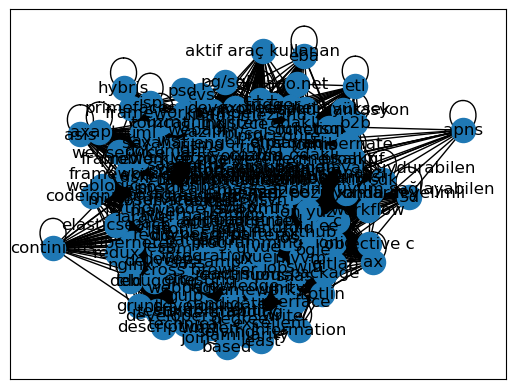

In [ ]:
nx.draw_networkx(Skills_Graph)
plt.show()

# Centrality Algorithms / STEP 17

In [ ]:
centrality_metrics =  pd.DataFrame()

## PAGERANK

In [ ]:
pagerank_centrality = nx.eigenvector_centrality(Skills_Graph)
print(pagerank_centrality)

{'java': 0.10686047783293358, 'yazılım geliştirme': 0.09805271492793317, 'üniversite mezunu': 0.09843781285182894, 'askerlik engelinin bulunmaması': 0.09766296983029105, 'html': 0.10606144503091668, 'css': 0.1057263701188347, 'sql': 0.1042669819439195, 'asp.net': 0.10170588117716804, 'c#': 0.09814430104885818, 'mvc': 0.10376825098061081, 'takım çalışmasına yatkın': 0.09732521510949907, '.net': 0.0997719343574642, 'jquery': 0.10542509667292671, 'analitik düşünebilen': 0.0953066161395721, 'api': 0.10538941394391622, 'oop': 0.10454947818266741, 'ekip çalışmasına yatkın': 0.09463977980975316, 'go': 0.1044933388165262, 'php': 0.08204384018633173, 'json': 0.10538426245279557, 'xml': 0.10541412266284285, 'soap': 0.10462194030328857, 'entityframework': 0.0904140946851351, 'bootstrap': 0.10083726112371212, 'problem çözme yeteneğine sahip': 0.09158592857541001, 'restful': 0.10098549154648523, 'sorumluluk sahibi': 0.08583003299119804, 'angular': 0.1012980656028357, 'js': 0.09764225311809373, 'ori

In [ ]:
pr = sorted(pagerank_centrality.items(), key=operator.itemgetter(1), reverse=True)

In [ ]:
sorted_pagerank_centrality = dict(sorted(pagerank_centrality.items(), key=operator.itemgetter(1), reverse=True))

In [ ]:
i = 0
with open("yazilim_uzmani_sorted_pagerank_centrality.txt", 'w', encoding="utf-8") as f: 
    for key, value in sorted_pagerank_centrality.items(): 
        i=i+1
        if i<50 : 
            f.write('%s:%s\n' % (key, value))
        else:
            break

In [ ]:
def personalised_pagerank(skill):
    i=0
    ppr = nx.pagerank(Skills_Graph, personalization={skill: 1})
    ppr = sorted(ppr.items(), key=operator.itemgetter(1), reverse=True)
    
    for item, score in ppr:
        i=i+1
        if(i<32):
            print(item, score)
        else:
            break
    return ppr

In [ ]:
print("TOP 25 SKILLS")
i=0
for item, score in pr:
    i=i+1
    if i<26:
        print(item, score)
    else: 
        break

TOP 25 SKILLS
java 0.10686047783293358
html 0.10606144503091668
css 0.1057263701188347
jquery 0.10542509667292671
xml 0.10541412266284285
api 0.10538941394391622
json 0.10538426245279557
soap 0.10462194030328857
oop 0.10454947818266741
go 0.1044933388165262
sql 0.1042669819439195
mvc 0.10376825098061081
asp.net 0.10170588117716804
angular 0.1012980656028357
oriented 0.10125509999063519
restful 0.10098549154648523
bootstrap 0.10083726112371212
.net 0.0997719343574642
üniversite mezunu 0.09843781285182894
c# 0.09814430104885818
react 0.09810298230231485
yazılım geliştirme 0.09805271492793317
agile 0.09767514645716396
askerlik engelinin bulunmaması 0.09766296983029105
js 0.09764225311809373


In [ ]:
print("Personalised PageRank")
j=0
for item, score in pr:
    j=j+1
    if j<26:
        print("\n"+item+"\n")
        ppr = personalised_pagerank(item)
        i=0
        with open("yazilim_uzmani_personalised_pagerank.txt", 'a', encoding="utf-8") as f: 
            f.write("\n"+item+"\n")
            for key, value in ppr: 
                i=i+1
                if i<50 : 
                    f.write('%s:%s\n' % (key, value))
                else:
                    break
    else:
        break


Personalised PageRank

java

java 0.16678027271447493
html 0.018057475022315445
css 0.016843245416452615
jquery 0.013897602636928538
yazılım geliştirme 0.013056675885610974
üniversite mezunu 0.012082020091137763
mvc 0.011900344922644098
asp.net 0.011666867746527067
sql 0.011560960094197397
askerlik engelinin bulunmaması 0.010752018439659483
c# 0.010151404624469597
api 0.009939222173010154
.net 0.009874050384403537
json 0.00908486673977783
xml 0.009050869681265167
takım çalışmasına yatkın 0.009037315809495317
go 0.008601780873960666
oop 0.008557556968099416
soap 0.00854527773743664
bootstrap 0.008305082201111206
analitik düşünebilen 0.007864778522883729
restful 0.0073603031880123525
angular 0.0071961213212277456
entityframework 0.006901178498876547
ekip çalışmasına yatkın 0.006831711427476194
oriented 0.006791262154723329
js 0.006777282607493319
react 0.006665717804803469
php 0.006636483976433906
android 0.006496214930474135
problem çözme yeteneğine sahip 0.005946299240610095

html

htm

# RESULT

Her bir alan için ayrı ayrı elimine edilecek kelimelerin çıkarılması lazım. 